## 📊 Building and Comparing Deep Learning Models using Keras & TensorFlow

### This guide demonstrates:
- How to **build** two CNN models using the **Keras API** in TensorFlow  
- How to **train** both models on the **MNIST dataset**  
- How to **compare** their performance in terms of **accuracy and validation metrics**


## 🔧 Step 1: Import Libraries

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

## 📥 Step 2: Prepare the Dataset
## Using the MNIST dataset (handwritten digits).


In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

# Add channel dimension
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


## 🧠 Step 3: Build CNN Models
## 🔸 Model A: Simple CNN

In [4]:
def build_model_A():
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

## 🔸 Model B: Deeper CNN with Dropout

In [5]:
def build_model_B():
    model = models.Sequential([
        layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.25),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


## 🏋️ Step 4: Train the Models

In [6]:
model_A = build_model_A()
model_B = build_model_B()

history_A = model_A.fit(x_train, y_train, epochs=5, validation_split=0.2)
history_B = model_B.fit(x_train, y_train, epochs=5, validation_split=0.2)

c:\Users\npran\OneDrive\Desktop\3.1\DNA\project\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.9427 - loss: 0.1917 - val_accuracy: 0.9787 - val_loss: 0.0763
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.9803 - loss: 0.0642 - val_accuracy: 0.9784 - val_loss: 0.0728
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.9865 - loss: 0.0433 - val_accuracy: 0.9827 - val_loss: 0.0598
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.9903 - loss: 0.0305 - val_accuracy: 0.9857 - val_loss: 0.0515
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.9932 - loss: 0.0216 - val_accuracy: 0.9833 - val_loss: 0.0637
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 119s 77ms/step - accuracy: 0.9390 - loss: 0.2014 - val_accuracy: 0.9834 - val_loss: 0.0539
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 142s 95ms/step - accuracy: 0.9740 - loss: 0.0873 - val_accuracy: 0.9879 - val_loss: 0.0429
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 132s 88ms/step - accuracy: 0.9804 - loss

## 📈 Step 5: Evaluate and Compare
## ✅ Final Accuracy

In [7]:
test_loss_A, test_acc_A = model_A.evaluate(x_test, y_test)
test_loss_B, test_acc_B = model_B.evaluate(x_test, y_test)

print(f"Model A Accuracy: {test_acc_A}")
print(f"Model B Accuracy: {test_acc_B}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9830 - loss: 0.0569
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.9904 - loss: 0.0329
Model A Accuracy: 0.9829999804496765
Model B Accuracy: 0.9904000163078308


## 📊 Plotting Validation Accuracy

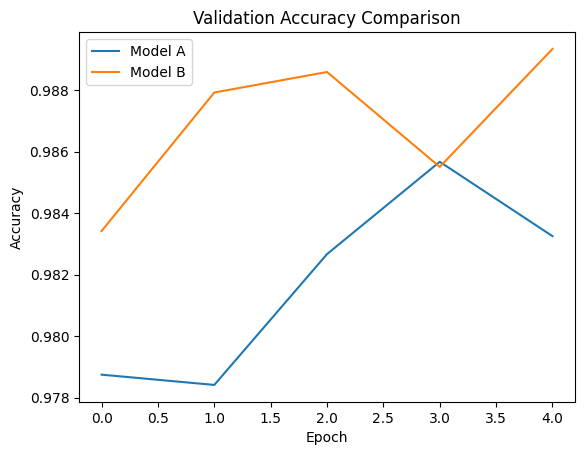

In [8]:
import matplotlib.pyplot as plt

plt.plot(history_A.history['val_accuracy'], label='Model A')
plt.plot(history_B.history['val_accuracy'], label='Model B')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# 📊 Model Comparison: MNIST Digit Classification

This project compares two convolutional neural network (CNN) models on the MNIST dataset using TensorFlow and Keras.

---

## ✅ Dataset

- **MNIST**: Handwritten digits (28x28 grayscale images)
- **Classes**: 10 (digits 0–9)
- **Train/Test Split**: 60,000 training and 10,000 test images

---

## 🧠 Model Architectures

### 🔸 Model A: Simple CNN
- 1 Convolutional layer
- MaxPooling
- Dense layer (64 units)
- Output layer (10 classes, softmax)

### 🔸 Model B: Deeper CNN with Dropout
- 2 Convolutional layers
- MaxPooling
- Dropout (0.25 and 0.5)
- Dense layer (128 units)
- Output layer (10 classes, softmax)

---

## 🏋️ Training Setup

- **Epochs**: 5
- **Validation Split**: 20%
- **Optimizer**: Adam
- **Loss**: Sparse Categorical Crossentropy
- **Metric**: Accuracy

---

## 📈 Evaluation Results

| Model     | Test Accuracy |
|-----------|----------------|
| Model A   | 98.29999804496765 %         |
| Model B   | 99.04000163078308 %   |

---

## 📊 Validation Accuracy Comparison

- Model B showed better generalization and higher validation accuracy.
- Dropout in Model B reduced overfitting compared to Model A.

---

## 📌 Conclusion

- **Model A** is suitable for quick experiments or lightweight applications.
- **Model B** is better for higher accuracy and production use due to deeper architecture and regularization.

---

> Further improvements could include Batch Normalization, Data Augmentation, or Hyperparameter Tuning.
